In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/icc-mens-t20-worldcup/ICC Mens T20 Worldcup.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/kaggle/input/icc-mens-t20-worldcup/ICC Mens T20 Worldcup.csv")
df.sample(2)

,Match No.,Date,Venue,1st Team,2nd Team,Stage,Toss Winning,Toss Decision,First Innings Score,Fall of wickets First Innings,...,Winners,Method,Won by,Winning Margin,Top Scorer,Highest Score,Best Bowler,Best Bowler Figure(Wickets Taken),Best Bowler Figure(Runs Recieved),Player Of The Match
48,49th,"Sunday,June 23,2024","Kensington Oval, Bridgetown, Barbados",United State Of America,England,Group 2,England,Fielding,115,10,...,England,Normal Match,Wickets,10,Jos Buttler,83,Adil Rashid,2,13,Adil Rashid
19,20th,"Sunday,June 9,2024","Sir Vivian Richards Stadium, North Sound, Antigua",Oman,Scotland,Group B,Oman,Batting,150,7,...,Scotland,Normal Match,Wickets,7,Brandon McMullen,31,Chris Greaves,1,2,Brandon McMullen


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Match No.                          55 non-null     object
 1   Date                               55 non-null     object
 2   Venue                              55 non-null     object
 3   1st Team                           55 non-null     object
 4   2nd Team                           55 non-null     object
 5   Stage                              55 non-null     object
 6   Toss Winning                       55 non-null     object
 7   Toss Decision                      55 non-null     object
 8   First Innings Score                55 non-null     object
 9   Fall of wickets First Innings      55 non-null     object
 10  Second Innings Score               55 non-null     object
 11  Fall of wickets Second Innings     55 non-null     object
 12  Winners   

**Datatype of each column is object so need to deal with it.**

In [5]:
df.describe()

,Match No.,Date,Venue,1st Team,2nd Team,Stage,Toss Winning,Toss Decision,First Innings Score,Fall of wickets First Innings,...,Winners,Method,Won by,Winning Margin,Top Scorer,Highest Score,Best Bowler,Best Bowler Figure(Wickets Taken),Best Bowler Figure(Runs Recieved),Player Of The Match
count,55,55,55,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,55,55,55
unique,55,26,9,19,18,9,19,3,41,9,...,17,3,3,29,39,38,41,8,28,44
top,1st,"Friday,June 14,2024","Kensington Oval, Bridgetown, Barbados",India,England,Group A,England,Fielding,106,10,...,South Africa,Normal Match,Runs,7,Rain,Rain,Rain,3,16,Rain
freq,1,3,9,6,7,11,6,42,4,16,...,8,48,26,9,4,4,4,25,6,4


In [6]:
print("Total Stadium Count",len(df['Venue'].value_counts()))
stadiums=df['Venue'].value_counts()
stadiums

Total Stadium Count 9


Venue
Kensington Oval, Bridgetown, Barbados                            9
Nassau County International Cricket Stadium, New York            8
Sir Vivian Richards Stadium, North Sound, Antigua                8
Providence Stadium, Guyana                                       6
Daren Sammy National Cricket Stadium, Gros Islet, St Lucia       6
Brian Lara Stadium, Tarouba, Trinidad                            5
Arnos Vale Ground, Kingstown, St Vincent                         5
Grand Prairie Stadium, Dallas                                    4
Central Broward Regional Park Stadium Turf Ground, Lauderhill    4
Name: count, dtype: int64

**The ICC Men's T20 World Cup was played across 9 stadiums.**

In [7]:
df.columns

Index(['Match No.', 'Date', 'Venue', '1st Team', '2nd Team', 'Stage',
       'Toss Winning', 'Toss Decision', 'First Innings Score',
       'Fall of wickets First Innings', 'Second Innings Score',
       'Fall of wickets Second Innings', 'Winners', 'Method', 'Won by',
       'Winning Margin', 'Top Scorer', 'Highest Score', 'Best Bowler',
       'Best Bowler Figure(Wickets Taken)',
       'Best Bowler Figure(Runs Recieved)', 'Player Of The Match'],
      dtype='object')

In [8]:
rain_count_on_stdum=df[df['Method']=='Rain']['Venue'].value_counts()
rain_count_on_stdum
((rain_count_on_stdum*100)/stadiums).dropna()

Venue
Central Broward Regional Park Stadium Turf Ground, Lauderhill    75.000000
Kensington Oval, Bridgetown, Barbados                            11.111111
Name: count, dtype: float64

**75% of the matches played in Lauderhill were declared by rain.**

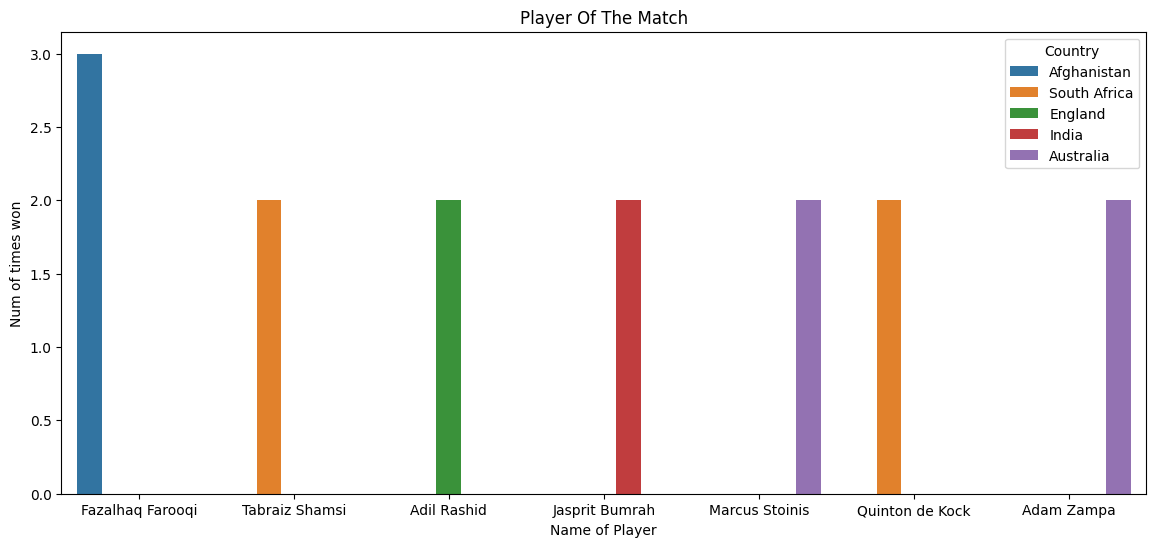

In [9]:
player_of_match_tournmnt=pd.DataFrame(df['Player Of The Match'].value_counts().drop('Rain',axis=0).reset_index())
player_of_match_tournmnt=player_of_match_tournmnt[player_of_match_tournmnt['count']>=2]
player_of_match_tournmnt=pd.merge(player_of_match_tournmnt,df[['Winners','Player Of The Match']],on='Player Of The Match',how='inner').drop_duplicates("Player Of The Match",keep='first').reset_index().drop(['index'],axis=1)
(player_of_match_tournmnt.rename({'Winners':"Country"},axis=1,inplace=True))
player_of_match_tournmnt.index = range(1, len(player_of_match_tournmnt) + 1)
plt.figure(figsize=(14,6))
sns.barplot(data=player_of_match_tournmnt,x='Player Of The Match',y='count',hue='Country')
plt.title('Player Of The Match')
plt.xlabel('Name of Player')
plt.ylabel('Num of times won')
plt.show()

In [10]:
len(df[df['Toss Winning']==df['Winners']])*100/len(df)

56.36363636363637

**In this ICC tournment, toss have't played an important role as there were just 56% probabilty of winning after winning the toss. There's 50% chances as usual of winning so dosent make much difference.** 

In [11]:
total_teams=[]
without_rn=df[~(df['Winners']=='Rain')]
tot1=pd.DataFrame(without_rn['1st Team'].value_counts())
tot2=pd.DataFrame(without_rn['2nd Team'].value_counts())
tot1.index,tot2.index
[total_teams.append(x) for x in tot1.index]
[total_teams.append(x) for x in tot2.index]
total_teams_index=set(total_teams)
len(total_teams_index)

20

**Total 20 teams participated in the tournment**

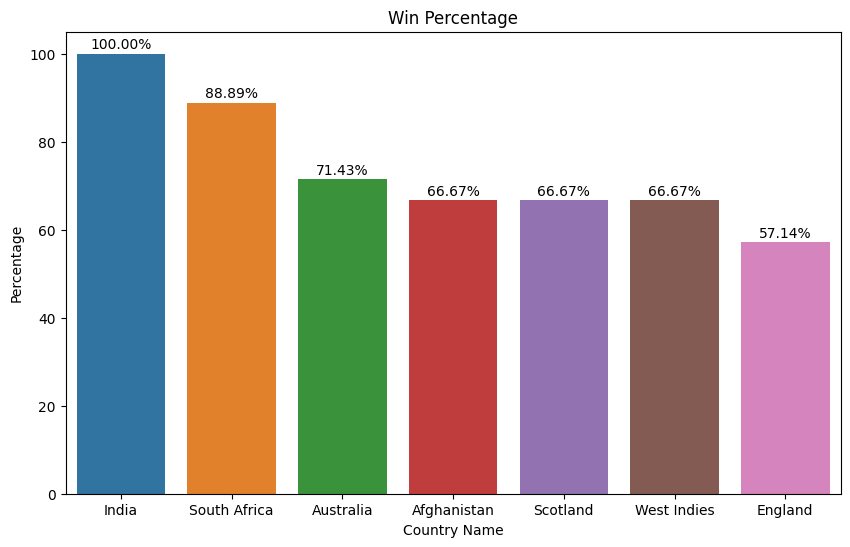

In [12]:
win_participate=pd.DataFrame(without_rn["Winners"].value_counts())
participation=tot1.add(tot2,fill_value=0).astype(int)
win_percentage=(win_participate*100).divide(participation,fill_value=0).sort_values('count',ascending=False)
win_percentage
plt.figure(figsize=(10,6))
barplot=sns.barplot(data=win_percentage.iloc[0:7,:],x=win_percentage.iloc[0:7,:].index,y='count')
for index, value in enumerate(win_percentage.iloc[0:7]['count']):
    barplot.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)
plt.title("Win Percentage")
plt.xlabel('Country Name')
plt.ylabel('Percentage')
plt.show()

**India has won all the matches they have played**

In [13]:
total_runs=without_rn['First Innings Score'].astype(int).sum()+without_rn['Second Innings Score'].astype(int).sum()
average_runs_per_match=total_runs/(len(without_rn['First Innings Score'])+len(without_rn['Second Innings Score']))
total_wickets=without_rn['Fall of wickets First Innings'].astype(int).sum()+without_rn['Fall of wickets Second Innings'].astype(int).sum()
average_wickets_per_match=total_wickets/(len(without_rn['Fall of wickets First Innings'])+len(without_rn['Fall of wickets Second Innings']))
print("Total Runs: ",total_runs,"\nAverage Runs per Match: ",int(np.ceil(average_runs_per_match)),"\nTotal Wickets: ",total_wickets,"\nAverage Wickets per Match: ",int(np.ceil(average_wickets_per_match)))

Total Runs:  12806 
Average Runs per Match:  126 
Total Wickets:  680 
Average Wickets per Match:  7


**This T20 World Cup was dominated by bowlers as Average Runs per match were close to just 126 runs while per match wickets were 7.** 

In [14]:
without_rn['Won by'].value_counts()

Won by
Runs       26
Wickets    25
Name: count, dtype: int64

In [15]:
run_wins=without_rn[without_rn['Won by']=='Runs']
avg_runs_won_by=run_wins['Winning Margin'].astype(int).mean()
run_wins=without_rn[without_rn['Won by']=='Wickets']
avg_wickets_won_by=run_wins['Winning Margin'].astype(int).mean()
print("Average Runs difference of winning: ",int(np.ceil(avg_runs_won_by)),"\nAverage Wickets difference of winning: ",int(np.ceil(avg_wickets_won_by)))

Average Runs difference of winning:  39 
Average Wickets difference of winning:  7


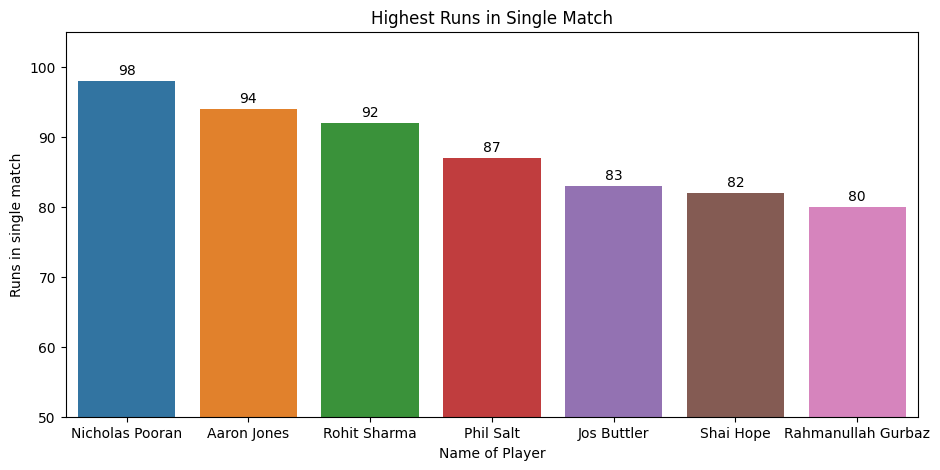

In [16]:
highest_run_score_per_match=without_rn.sort_values("Highest Score",ascending=False)
highest_run_score_per_match=highest_run_score_per_match.iloc[:7,[16,17]]
highest_run_score_per_match['Highest Score']=highest_run_score_per_match['Highest Score'].astype(int)
plt.figure(figsize=(11,5))
highrunplot=sns.barplot(data=highest_run_score_per_match,x='Top Scorer',y='Highest Score')
for index, value in enumerate(highest_run_score_per_match['Highest Score']):
    highrunplot.text(index, value + 0.5, f'{value}', ha='center', va='bottom', fontsize=10)
plt.title("Highest Runs in Single Match")
plt.xlabel('Name of Player')
plt.ylim(50,105)
plt.ylabel('Runs in single match')
plt.show()

In [17]:
toss_by_ground=pd.DataFrame(without_rn.groupby('Venue')['Toss Decision'].value_counts())
total_played_matches=[]
for i in range(len(toss_by_ground)):
    name=toss_by_ground.index[i][0]
    total_played=toss_by_ground.loc[name]['count'].sum()
    total_played_matches.append(total_played)
toss_by_ground['total_played_matches']=total_played_matches
toss_by_ground['decision_on_toss_percentage']=(toss_by_ground['count']*100/toss_by_ground['total_played_matches']).round(2)
toss_by_ground

count  \
Venue                                              Toss Decision          
Arnos Vale Ground, Kingstown, St Vincent           Fielding           4   
                                                   Batting            1   
Brian Lara Stadium, Tarouba, Trinidad              Fielding           4   
                                                   Batting            1   
Central Broward Regional Park Stadium Turf Grou... Fielding           1   
Daren Sammy National Cricket Stadium, Gros Isle... Fielding           6   
Grand Prairie Stadium, Dallas                      Fielding           4   
Kensington Oval, Bridgetown, Barbados              Fielding           5   
                                                   Batting            3   
Nassau County International Cricket Stadium, Ne... Fielding           6   
                                                   Batting            2   
Providence Stadium, Guyana                         Fielding           5   
                                                   Batting            1   
Sir Vivian Richards Stadium, North Sound, Antigua  Fielding           7   
                                                   Batting            1   

                                                                  total_played_matches  \
Venue                                              Toss Decision                         
Arnos Vale Ground, Kingstown, St Vincent           Fielding                          5   
                                                   Batting                           5   
Brian Lara Stadium, Tarouba, Trinidad              Fielding                          5   
                                                   Batting                           5   
Central Broward Regional Park Stadium Turf Grou... Fielding                          1   
Daren Sammy National Cricket Stadium, Gros Isle... Fielding                          6   
Grand Prairie Stadium, Dallas                      Fielding                          4   
Kensington Oval, Bridgetown, Barbados              Fielding                          8   
                                                   Batting                           8   
Nassau County International Cricket Stadium, Ne... Fielding                          8   
                                                   Batting                           8   
Providence Stadium, Guyana                         Fielding                          6   
                                                   Batting                           6   
Sir Vivian Richards Stadium, North Sound, Antigua  Fielding                          8   
                                                   Batting                           8   

                                                                  decision_on_toss_percentage  
Venue                                              Toss Decision                               
Arnos Vale Ground, Kingstown, St Vincent           Fielding                             80.00  
                                                   Batting                              20.00  
Brian Lara Stadium, Tarouba, Trinidad              Fielding                             80.00  
                                                   Batting                              20.00  
Central Broward Regional Park Stadium Turf Grou... Fielding                            100.00  
Daren Sammy National Cricket Stadium, Gros Isle... Fielding                            100.00  
Grand Prairie Stadium, Dallas                      Fielding                            100.00  
Kensington Oval, Bridgetown, Barbados              Fielding                             62.50  
                                                   Batting                              37.50  
Nassau County International Cricket Stadium, Ne... Fielding                             75.00  
                                                   Batting                              25.00  
Providence 

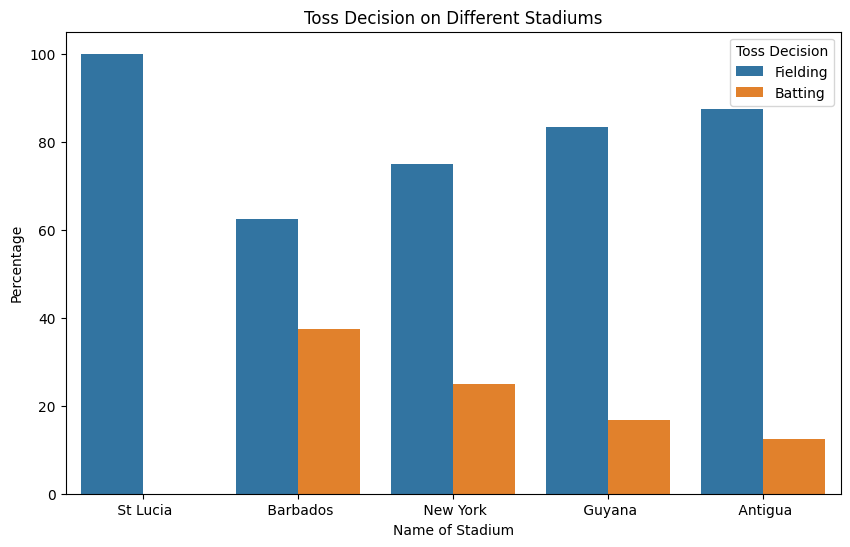

In [18]:
toss_by_ground=toss_by_ground[toss_by_ground['total_played_matches']>=6]
toss_by_ground=toss_by_ground.reset_index()
Venue=[]
for i in toss_by_ground['Venue']:
    Venue.append(i.split(",")[-1])
toss_by_ground['Venue']=Venue
plt.figure(figsize=(10,6))
sns.barplot(data=toss_by_ground,x='Venue',y='decision_on_toss_percentage',hue='Toss Decision')
plt.title("Toss Decision on Different Stadiums")
plt.xlabel('Name of Stadium')
plt.ylabel('Percentage')
plt.show()

**In St Lucia, all team who win the toss chooses Fielding. On winning toss, team usually choose Fielding.** 